In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, ParameterGrid, KFold
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz

1 - Import dataset

In [99]:
dataset = load_wine()
X = dataset["data"]
y = dataset["target"]
features = dataset["feature_names"]

In [100]:
print(f"There are {X.shape[0]} records available.")
if ~np.isnan(X).all():
    print("There are no NaN values in X.")
else:
    n = 0
    for i in np.isnan(X):
        if i == True:
            n += 1
    print(f"There are {n} NaN values in X.")
if ~np.isnan(y).all():
    print("There are no NaN values in y.")
else:
    n = 0
    for i in np.isnan(y):
        if i == True:
            n += 1
    print(f"There are {n} NaN values in y.")
classes = {}
for i in y:
    if i in classes:
        classes[i] += 1
    else: 
        classes[i] = 1
print(f"There are {len(classes)} classes in the database.")


There are 178 records available.
There are no NaN values in X.
There are no NaN values in y.
There are 3 classes in the database.


2 - Create a DecisionTreeClassifier object without hyperparameters and train it with X and y

In [101]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

3 - Visualise the decision tree

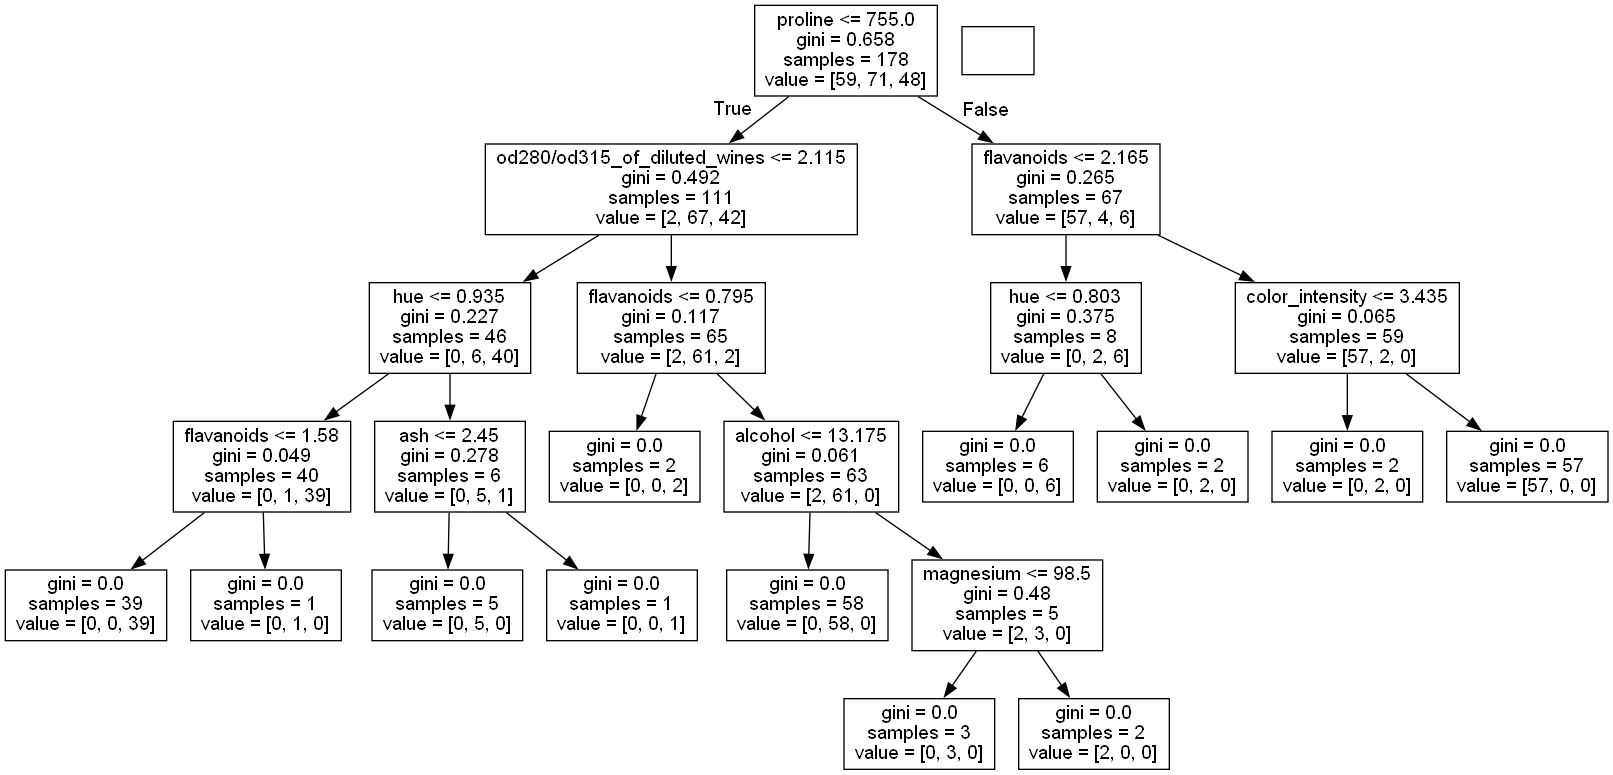

In [102]:
dot_code = export_graphviz(clf, feature_names=features)
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())

4 - Make the prediction using clf and compute the accuracy score

In [103]:
y_pred = clf.predict(X)
acc = accuracy_score(y, y_pred)
print(acc)

1.0


5 - Split the dataset into train and test sets

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

6 - Train the model using X_train and y_train, then compute scores with X_test and y_test

In [105]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)
p, r, f1, s = precision_recall_fscore_support(y_test, y_pred)
print("Printing scores with 'average=None'")
print(p)
print(r)
print(f"{f1}\n")
micro_p, micro_r, micro_f1, micro_s = precision_recall_fscore_support(y_test, y_pred, average='micro')
print("Printing scores with 'average=micro'")
print(micro_p)
print(micro_r)
print(f"{micro_f1}\n")
macro_p, macro_r, macro_f1, macro_s = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Printing scores with 'average=macro'")
print(macro_p)
print(macro_r)
print(f"{macro_f1}\n")
weighted_p, weighted_r, weighted_f1, weighted_s = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Printing scores with 'average=weighted'")
print(weighted_p)
print(weighted_r)
print(f"{weighted_f1}\n")

0.9444444444444444
Printing scores with 'average=None'
[0.92857143 0.9375     1.        ]
[0.92857143 0.9375     1.        ]
[0.92857143 0.9375     1.        ]

Printing scores with 'average=micro'
0.9444444444444444
0.9444444444444444
0.9444444444444444

Printing scores with 'average=macro'
0.9553571428571429
0.9553571428571429
0.9553571428571429

Printing scores with 'average=weighted'
0.9444444444444444
0.9444444444444444
0.9444444444444444



7 - Use different configurations with the decision tree

In [106]:
params = {
    "max_depth": [None, 2, 4, 8],
    "splitter": ["best", "random"]
}
idx = pd.MultiIndex.from_product([["None", "2", "4", "8"],
                                  ["best", "random"]],
                                  names=['max_depth', 'splitter'])
columns = ['Accuracy', 'Precision', 'Micro_precision', 'Macro_precision', 'Weighted_precision', 
           'Recall', 'Micro_recall', 'Macro_recall', 'Weighted_recall', 
           'F1', 'Micro_f1', 'Macro_f1', 'Weighted_f1']
diff_configs_stats = pd.DataFrame('-', idx, columns)
for config in ParameterGrid(params):
    clf = DecisionTreeClassifier(**config)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    p, r, f1, s = precision_recall_fscore_support(y_test, y_pred)
    micro_p, micro_r, micro_f1, micro_s = precision_recall_fscore_support(y_test, y_pred, average='micro')
    macro_p, macro_r, macro_f1, macro_s = precision_recall_fscore_support(y_test, y_pred, average='macro')
    weighted_p, weighted_r, weighted_f1, weighted_s = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    diff_configs_stats.loc[str(config["max_depth"]), str(config["splitter"])] = [acc, p, micro_p, macro_p, weighted_p, 
                                                                                 r, micro_r, macro_r, weighted_r, 
                                                                                 f1, micro_f1, macro_f1, weighted_f1]
print(diff_configs_stats)


                    Accuracy                                      Precision  \
max_depth splitter                                                            
None      best      0.944444              [0.9285714285714286, 0.9375, 1.0]   
          random    0.944444                 [1.0, 0.8888888888888888, 1.0]   
2         best      0.805556  [0.6842105263157895, 0.9090909090909091, 1.0]   
          random    0.805556  [0.7058823529411765, 0.8461538461538461, 1.0]   
4         best      0.944444              [0.9285714285714286, 0.9375, 1.0]   
          random    0.916667               [0.875, 0.9333333333333333, 1.0]   
8         best      0.944444              [0.9285714285714286, 0.9375, 1.0]   
          random    0.805556  [0.8181818181818182, 0.7368421052631579, 1.0]   

                   Micro_precision Macro_precision Weighted_precision  \
max_depth splitter                                                      
None      best            0.944444        0.955357           0.

8 - Use k-fold cross-validation

In [197]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
k = 5
kf = KFold(k, shuffle=True)
train_valid_sets = {}
prf1 = pd.DataFrame(columns=['weighted_p', 'weighted_r', 'weighted_f1'], index=np.arange(k).tolist(), dtype=float)
i = 0
for train_indices, validation_indices in kf.split(X_train_valid):
    train_valid_sets[i] = []
    train_valid_sets[i].append(train_indices)
    X_train = X_train_valid[train_indices]
    X_valid = X_train_valid[validation_indices]
    y_train = y_train_valid[train_indices]
    y_valid = y_train_valid[validation_indices]
    clf = DecisionTreeClassifier(splitter='random')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    p, r, f1, _ = precision_recall_fscore_support(y_valid, y_pred, average='weighted')
    prf1.iloc[i] = [p, r, f1]
    i += 1
print(prf1)
idx = prf1['weighted_f1'].idxmax()
X_train = X_train_valid[train_valid_sets[idx][0]]
y_train = y_train_valid[train_valid_sets[idx][0]]
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
p, r, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(p)
print(r)
print(f1)

   weighted_p  weighted_r  weighted_f1
0    0.969349    0.965517     0.965782
1    1.000000    1.000000     1.000000
2    0.968254    0.964286     0.964286
3    0.875000    0.857143     0.858673
4    1.000000    1.000000     1.000000
0.9239028944911298
0.9166666666666666
0.9168609168609169
